In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

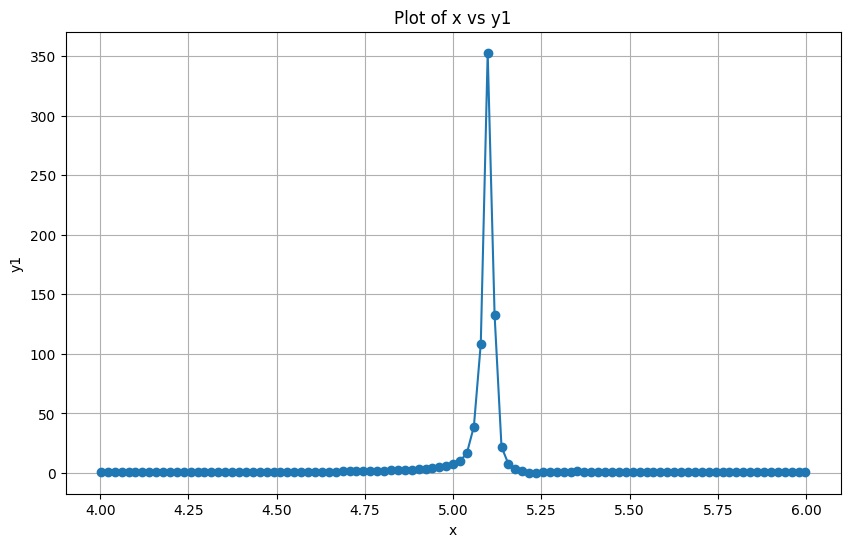

In [36]:
df = pd.read_csv('FID_1H_cf_on_resonance.csv')

plt.figure(figsize=(10, 6))

min = 4
max = 6

filtered_df = df[(df['x'] >= min) & (df['x'] <= max)]

ppm_data = filtered_df['x']
intensity_data = abs(filtered_df['y1'])

plt.plot(ppm_data, intensity_data, marker='o') # You can change the marker style

plt.title('Plot of x vs y1') # Add a title
plt.xlabel('x') # Name the x-axis
plt.ylabel('y1') # Name the y-axis
plt.grid(True) # Show grid
plt.show()


In [35]:
# max_y_row = df[df['y1'] == df['y1'].max()]
# x_at_max_y = max_y_row['x'].values[0]
# print(f"CF = {x_at_max_y}")


In [41]:
def gaussian(w, A, w0, sigma):
    return A * np.exp(-((w - w0) ** 2) / (2 * sigma ** 2))

initial_guesses = [np.max(intensity_data), ppm_data[np.argmax(intensity_data)], 0.01]  # Example initial guesses

# Perform the curve fit
popt, pcov = curve_fit(gaussian, ppm_data, intensity_data, p0=initial_guesses)

# Plot the original data and the fit
plt.figure()
plt.plot(ppm_data, intensity_data, 'b-', label='NMR Spectrum')
plt.plot(ppm_data, gaussian(ppm_data, *popt), 'r--', label=f'Fit: A={popt[0]:.2f}, $ν_0={popt[1]:.2f}$ ppm, $σ={popt[2]:.4f}$')
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Intensity')
plt.title('Gaussian Fit of NMR Peak')
plt.legend()
plt.show()

# Print the optimal parameters
print(f"Optimal parameters: A = {popt[0]}, w0 = {popt[1]} ppm, sigma = {popt[2]}")

KeyError: 56